In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing dataset
df=pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#to see the null values in dataset
df.isnull().sum().sum()

0

there is no null column in the database

In [6]:
#spliting the catagurical and numerical column
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [7]:
#transform catagourical column in to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in categorical_cols:
  df[col]=le.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [8]:
#treating the outliers
for columns in df.columns:
  Q1=df[columns].quantile(0.25)
  Q3=df[columns].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[columns]=np.where(df[columns]<lower_bound,lower_bound,df[columns])
  df[columns]=np.where(df[columns]>upper_bound,upper_bound,df[columns])

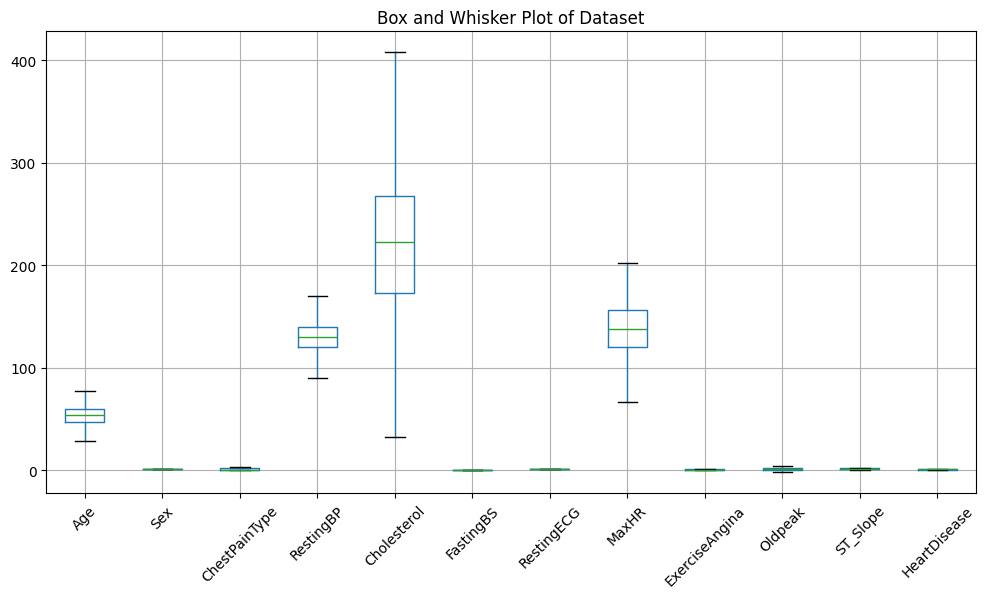

In [10]:
#ploting box plot to see outliers if any
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Box and Whisker Plot of Dataset')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.0,918.000000,918.000000,918.000000,918.0,918.0,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.0,0.781046,132.125272,203.985158,0.0,1.0,136.819172,0.404139,0.877778,1.361656,0.553377
std,9.432617,0.0,0.956519,16.993314,95.922341,0.0,0.0,25.432057,0.490992,1.031693,0.607056,0.497414
min,28.000000,1.0,0.000000,90.000000,32.625000,0.0,1.0,66.000000,0.000000,-2.250000,0.000000,0.000000
25%,47.000000,1.0,0.000000,120.000000,173.250000,0.0,1.0,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.0,0.000000,130.000000,223.000000,0.0,1.0,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.0,2.000000,140.000000,267.000000,0.0,1.0,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.0,3.000000,170.000000,407.625000,0.0,1.0,202.000000,1.000000,3.750000,2.000000,1.000000


In [11]:
#now scaling and standarizing the numerical data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() # Corrected the typo here
df[numerical_cols] = ss.fit_transform(df[numerical_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1.0,1.0,0.463654,0.886771,0.0,1.0,1.384080,0.0,-0.851276,2.0,0.0
1,-0.478484,1.0,2.0,1.641229,-0.250184,0.0,1.0,0.754610,0.0,0.118532,1.0,1.0
2,-1.751359,1.0,1.0,-0.125133,0.824187,0.0,1.0,-1.527219,0.0,-0.851276,2.0,0.0
3,-0.584556,1.0,0.0,0.345897,0.104463,0.0,1.0,-1.133801,1.0,0.603436,1.0,1.0
4,0.051881,1.0,2.0,1.052442,-0.093722,0.0,1.0,-0.583014,0.0,-0.851276,2.0,0.0


In [12]:
X=df.drop('HeartDisease',axis=1)
Y=df['HeartDisease']

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

Implementing Knn model

In [15]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [16]:
knn.predict(X_test)

array([0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.])

In [17]:
accuracy_score(Y_test,knn.predict(X_test))

0.8532608695652174

Classification Report:
               precision    recall  f1-score   support

         0.0       0.71      0.90      0.79        77
         1.0       0.91      0.74      0.81       107

    accuracy                           0.80       184
   macro avg       0.81      0.82      0.80       184
weighted avg       0.83      0.80      0.81       184



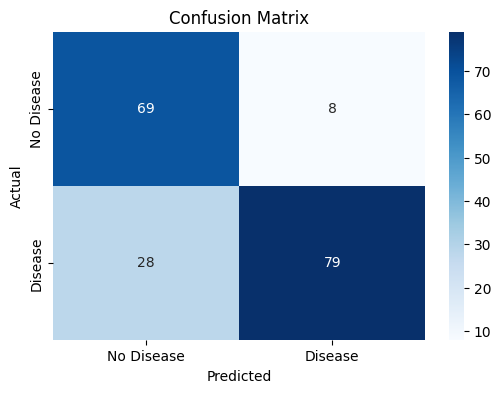

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate predictions
y_pred = knn.predict(X_test)

# Print the classification report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


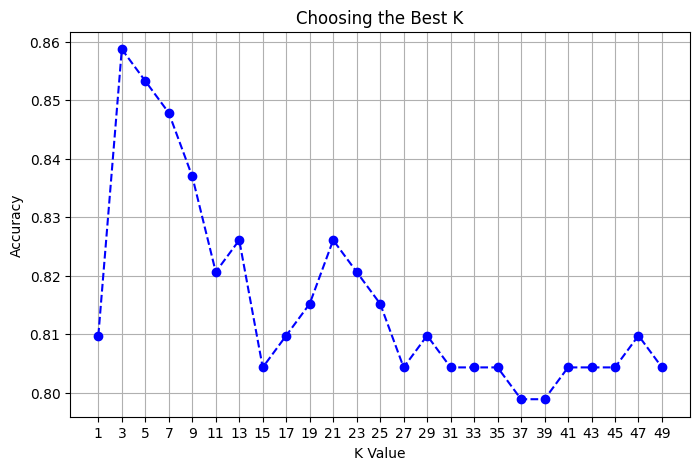

Best K: 3


<Figure size 640x480 with 0 Axes>

In [18]:
k_values = range(1, 50, 2)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Create a KNN classifier with k neighbors
    knn.fit(X_train, Y_train)  # Train the classifier
    y_pred = knn.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(Y_test, y_pred)  # Calculate accuracy
    accuracy_scores.append(accuracy)  # Store the accuracy score

# Plot K vs Accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.grid(True)
plt.show()
plt.tight_layout()

# Find best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")